In [1]:
import pandas as pd

data = pd.read_csv('titanic-data.csv')

In [2]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
data['Age'] = data['Age'].fillna(method='pad')

#https://chrisalbon.com/python/pandas_binning_data.html

age_bins = [0,10,20,30,40,50,100]
data['BinnedAge'] = pd.cut(data['Age'], age_bins)

couple_bins = [0,1,2,100]
couple_labels = ['0','1','More than 1']
# data['Coupled'] = ( data['SibSp'] == 1 ) & ( data['Age'] > 25 )
data['Coupled'] = pd.cut(data['SibSp'], couple_bins, labels=couple_labels, right=False)
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


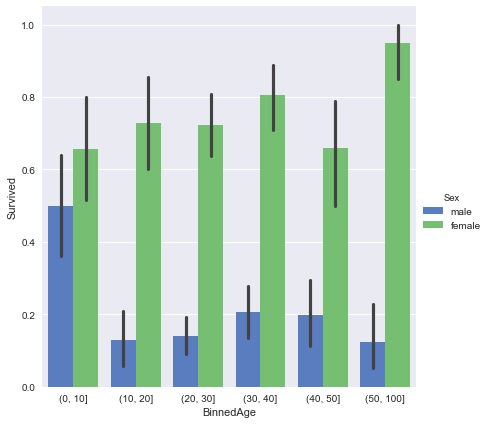

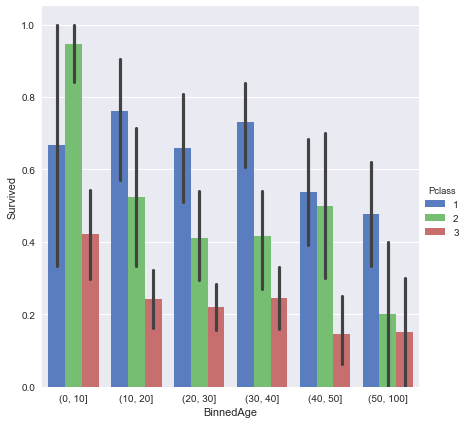

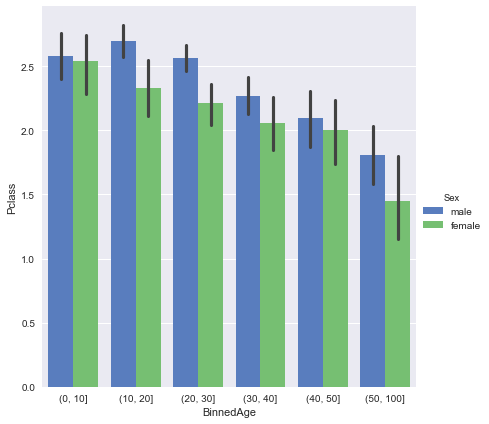

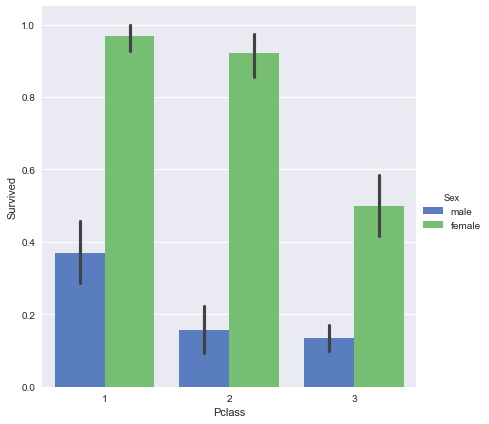

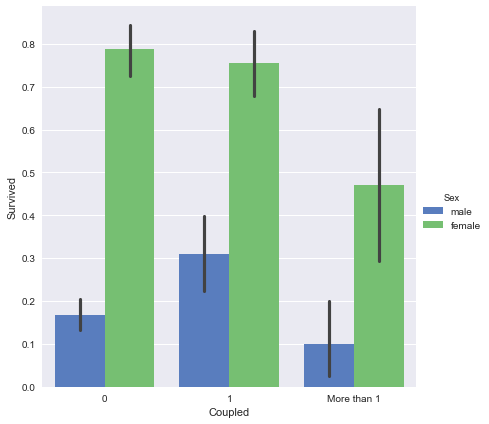

In [27]:
#https://chrisalbon.com/python/matplotlib_scatterplot_from_pandas.html
#https://seaborn.pydata.org/examples/factorplot_bars.html
#http://seaborn.pydata.org/generated/seaborn.barplot.html

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.pairplot(data=data[ ["Pclass","Age",'Sex','SibSp','Parch','Survived'] ])
g = sns.factorplot(x="BinnedAge", y="Survived", hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")
g = sns.factorplot(x="BinnedAge", y="Survived", hue="Pclass", data=data,
                   size=6, kind="bar", palette="muted")
g = sns.factorplot(x="BinnedAge", y="Pclass", hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")
g = sns.factorplot(x="Coupled", y="Survived", hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")